# Занятие 7

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as sts  
%matplotlib inline

## Общий фреймворк проверки гипотез
1. Формулировка основной гипотезы $H_{0}$ и конкурирующей гипотезы $H_1$.
2. Задание уровня значимости $\alpha$ , на котором в дальнейшем и будет сделан вывод о справедливости гипотезы. Он равен вероятности допустить ошибку первого рода.
3. Расчёт статистики $\phi$  критерия такой, что:
* её величина зависит от исходной выборки $(X_{1},\ldots ,X_{n}): \phi =\phi (X_{1},\ldots ,X_{n})$
* по её значению можно делать выводы об истинности гипотезы $H_{0}$
* статистика $\phi$, как функция случайной величины $\mathbf {X}$, также является случайной величиной и подчиняется какому-то закону распределения.
4. Построение критической области. Из области значений $\phi$  выделяется подмножество $\mathcal {C}$ таких значений, по которым можно судить о существенных расхождениях с предположением. Его размер выбирается таким образом, чтобы выполнялось равенство $P(\phi \in {\mathcal {C}})=\alpha$. Это множество $\mathcal {C}$ и называется критической областью.
5. Вывод об истинности гипотезы. Наблюдаемые значения выборки подставляются в статистику $\phi$  и по попаданию (или непопаданию) в критическую область $\mathcal {C}$ выносится решение об отвержении (или принятии) выдвинутой гипотезы $H_{0}$.

### Задача
В десятизначной записи числа Пи среди 10000 первых десятичных знаков после запятой цифры 0,1,...,9 встречаются соответственно h=(968, 1026, 1021, 972, 1014, 1046, 1021, 970, 948, 1014) раз. Можно ли при уровне значимости 0.05 (величина ошибки 1-ого рода) считать эти цифры случайными?

Решим эту задачу, воспользовавшись критерием согласия Пирсона хи-квадрат.

#### Критерий хи-квадрат
На практике часто требуется проверить гипотезу $H_0$ о том, что выборка $\mathbf{X} = (\mathbf{X_1}, \ldots, \mathbf{X_n})$ получена из генеральной совокупности с функцией распределения $F(x)$. Относительно конкурирующей гипотезы каких-нибудь предположений не делается. В этом случае применяются *критерии согласия*, который строятя на основе выбора некоторой статистики $T = T(\mathbf{X}, F)$, характеризующей отклонение эмпирических данных от соответствующих гипотезе $H_0$ гипотетических значений.

**Как строится критерий согласия хи-квадрат? (Ивченко, Медведев)**

Разобьем прямую на $s$ интервалов $z_0=-\infty < z_1 < \ldots < z_{s-1} < z_s = \infty$. По известной функции F(x) (которую мы берем из утверждения нулевой гипотезы) вычисляем вероятности $p_i = F(z_i) - F(z_{i-1}),\ i=1,\ldots,s$.

Пусть $h_i,\ i=1,\ldots,s$ -- это число тех $\mathbf{X_j}$ из выборки $\mathbf{X}\ (j=1,\ldots,n)$, которые удовлетворяют условию $z_{i-1} < \mathbf{X_j} \leq z_i$. Тогда при справедливости нулевой гипотезы случайные величины $h_1,\ldots,h_s$ имеют полиномиальное распределение с числом испытаний $n$ и вероятностями исходов $\mathbf{p} = (p_1,\ldots,p_s)$. Имеем 
$$\mathbf{P}{h_1 = n_1,\ldots,h_s=n_s} = \frac{n!}{n_1!\ldots n_s!}p_1^{n_1}\ldots p_s^{n_s}$$,
$$n_1 + \ldots + n_2 = n$$

Так мы свели первоначальную задачу к проверке гипотезы о том, что чатсоты $\mathbf{h} = (h_1,\ldots,h_s)$ имеют полиномиальное распределение. В этом случае частоты $h_i$ должны быть близки к среднему значению $\mathop{\mathbb{E}}h_i = np_i,\ 1,\ldots,s$. Общее отклонение всех $h_i$ можно измерять разными способами. Чаще всего в качестве меры отклонения используют величину, введенную Пирсоном,
$$\mathbf{X}_n^2 = \mathbf{X}_n^2(\overline{h}) = \sum_{j=1}^{s}\frac{(h_j - np_j)^2}{np_j} = \sum_{j=1}^{s}\frac{h_j^2}{np_j} - n$$

Величина $\mathbf{X}_n^2$ случайная и обладает следующим важным свойством: при справедливости принятой гипотезы распределение этой величины в пределе при $n \rightarrow \infty$ не зависит от вектора $\mathbf{p}$ и имеет известное распределение хи-квадрат с $s-1$ степенями свободы, т.е. при $n \rightarrow \infty$ для любого $x$ и постоянных $p_j > 0,\ j=1,\ldots,s$,
$$\mathbf{P}\{\mathbf{X}_n^2 < x\} \rightarrow \mathbf{P}\{\chi_{s-1}^2 < x\} $$

С помощью этого результата введем следующий критерий для проверки гипотезы $H_0:\ F_{\xi}(x) = F(x)$. Зададим уровень значимости $\alpha > 0$, выберем значение величины $s$, $z_1,\ldots,z_s$ и найдем по ним значения вектора вероятностей $\mathbf{p} = (p_1,\ldots,p_s)$ и вектора частот $\mathbf{h} = \{h_1,\ldots,h_s\}$. Считая, что $\mathbf{X}_n^2$ распределено согласно закону $\chi^2(s-1)$, находим такое число $t_\alpha$ (границу критической области критерия), что
$$\mathbf{P}\{\mathbf{X}_n^2 \geq t_\alpha\} = \alpha$$

Таким образом, $t_\alpha = \chi_{1-\alpha;s-1}^2$ -- ($1-\alpha$) квантиль распределения $\chi^2(s-1)$.

Итак, в первую очередь определим
1. Число исходов s?
2. Уровень значимости дан $\alpha = 0.05$
3. Вычислим границу критической области для заданного уровня значимости
4. Подсчитаем значение статистики $\mathbf{X}_n^2(\mathbf{h})$ при $p_1 = \ldots = p_{10} = \frac{1}{10}$
5. Сравним с границей критической области, согласуются ли данные с нулевой гипотезой? Какая здесь нулевая гипотеза, а какая альтернатива?

In [ ]:
sts.chi2.ppf(0.95, 10-1)

In [2]:
sts.chisquare([968, 
               1026, 
               1021, 
               972, 
               1014, 
               1046, 
               1021, 
               970, 
               948, 
               1014], [1000 for i in range(10)] )

Power_divergenceResult(statistic=9.478000000000002, pvalue=0.39436959603532634)

In [3]:
sts.chisquare([1000 for i in range(10)], 
              [1000 for i in range(10)])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

## Сгенерируем данные по кликам на объявления
Параметром функции gen_events является CTR

In [4]:
# функция генерации бинарных последовательностей
def gen_events(p, lower_=200, upper_=250):
    events_number = np.random.randint(lower_, upper_)
    events = np.zeros(events_number)
    events[np.random.rand(events_number) <= p] = 1
    return events


In [10]:
adv_a = gen_events(0.35)
adv_b = gen_events(0.3)

In [11]:
adv_a.shape

(215,)

In [12]:
len(adv_b)

204


## p-value
### Определимся с гипотезами
Будем так $\hat{p}$ обозначать среднюю величину по выборке

$H_0:\ p_1 - p_2 = 0$

$H_1:\ p_1 - p_2 > 0$

В случае если нулевая гипотеза верна, то 

$\hat{p_1} - \hat{p_2} \sim \mathbf{N}(p_1 - p_2 = 0, \frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2})$ 

(используем нормальное распределение, так как кол-во элементов в выборке достаточно большое, т.е мы используем так называемый *z-критерий*, хотя точнее было бы использовать *t-критерий*) 

critical for alpha = 0.12497870426820494


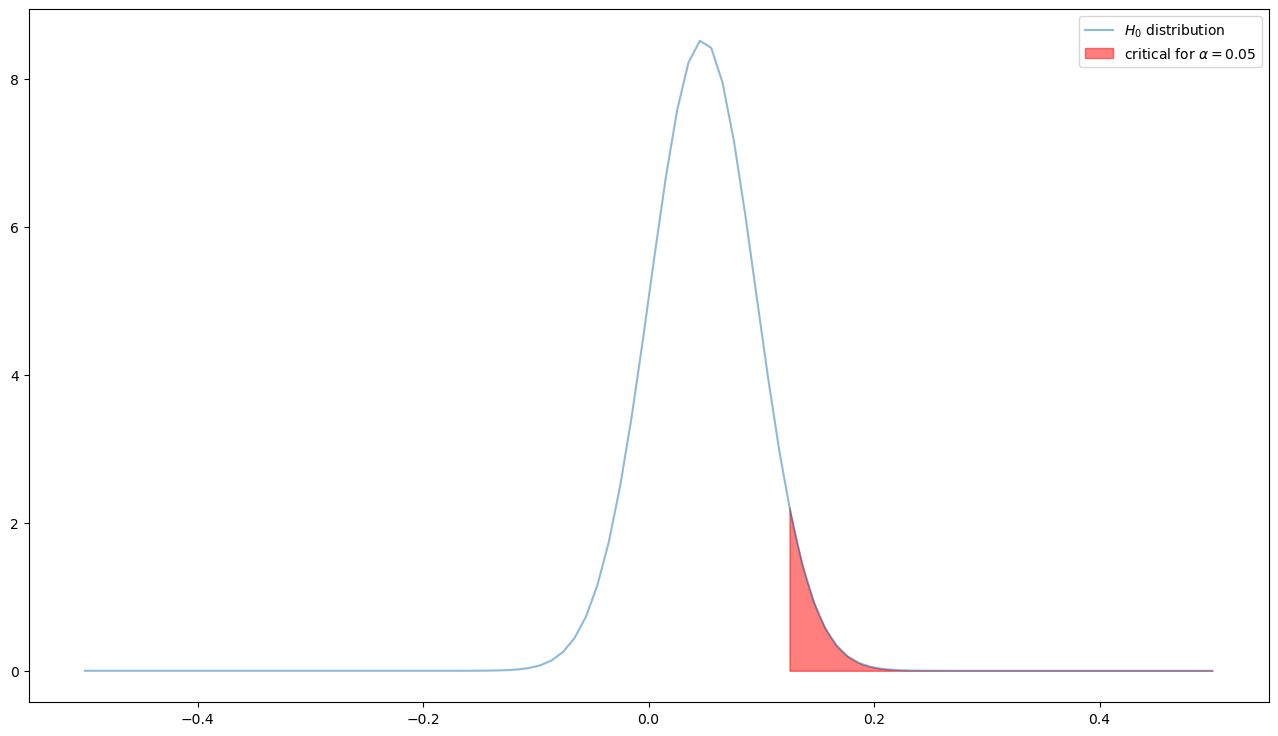

In [13]:
p1_ = np.mean(adv_a)
n1_ = adv_a.shape[0]
p2_ = np.mean(adv_b)
n2_ = adv_b.shape[0]
norm_rv = sts.norm(p1_-p2_, np.sqrt(p1_*(1-p1_)/n1_ + p2_*(1-p2_)/n2_))

alpha = 0.05
# строим теоретическую плотность
x = np.linspace(-0.5,0.5,100)
pdf = norm_rv.pdf(x)
plt.figure(figsize=(16,9))
plt.plot(x, pdf, label='$H_0$ distribution', alpha=0.5)

q_b = norm_rv.ppf(1-alpha)
print("critical for alpha = {}".format(q_b))
to_fill = np.linspace(q_b, 0.5, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='red', label='critical for $\\alpha = {}$'.format(alpha))

plt.legend()

Теперь посчитаем максимально достижимый уровень значимости или p-value для альтернативной гипотезы $p_1 > p_2$

Для этого нам собственно нужно посчитать значение статистики, и посмотреть куда попало ее значение, если истинна гипотеза $H_0$, а значит и распределение выше

In [14]:
p1_ - p2_

0.04806201550387601

Мы видим, что значение этой разности попало в правый конец распределения. 

**О чем это говорит?**

...

In [15]:
norm_rv.cdf(p1_ - p2_) # это наш достижмый уровень значимости

0.5

critical for alpha = 0.12497870426820494


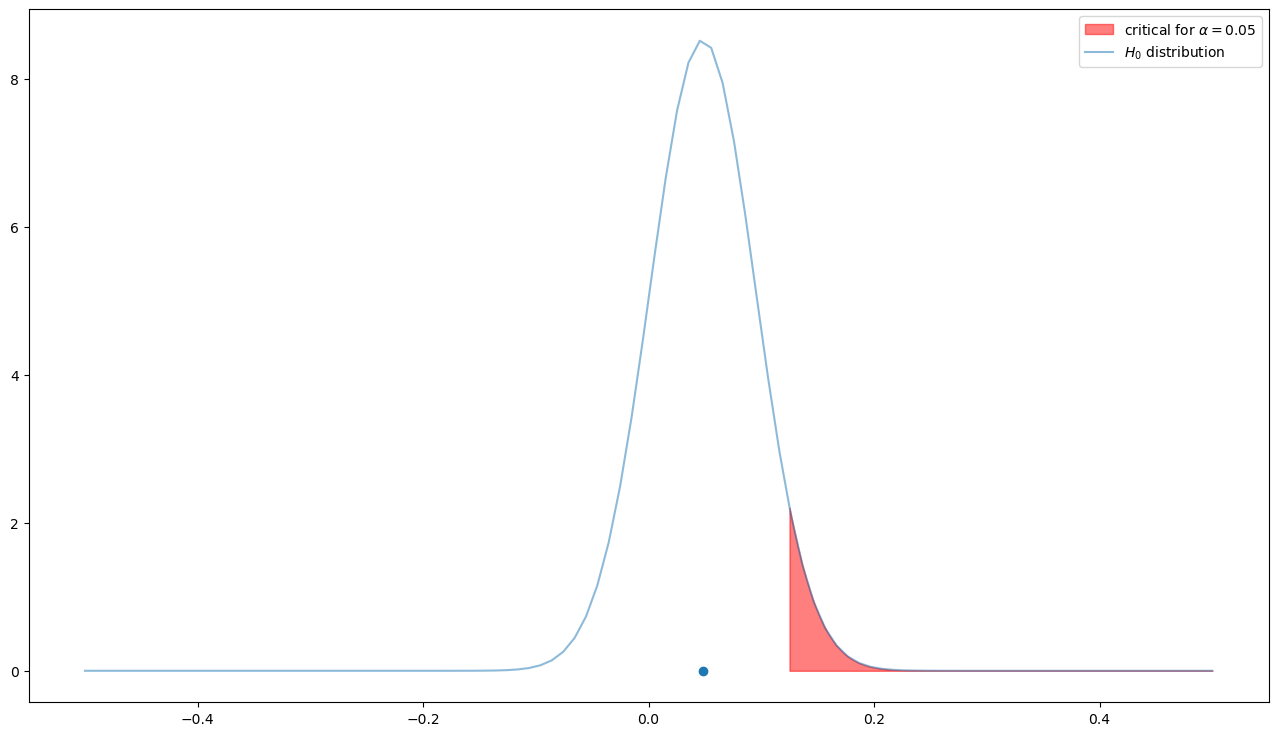

In [16]:
# p1-p2 
q_b = norm_rv.ppf(1-alpha)
print("critical for alpha = {}".format(q_b))
to_fill = np.linspace(q_b, 0.5, 100)

plt.figure(figsize=(16,9))
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='red', label='critical for $\\alpha = {}$'.format(alpha))
plt.scatter(p1_ - p2_, 0)
plt.plot(x, pdf, label='$H_0$ distribution', alpha=0.5)

plt.legend()

## $\alpha$, $\beta$ и размер эффекта
В примере выше невозможно установить значение величины ошибки 2-ого рода, поскольку истинное значение разности нам неизвестно (но вообще тогда зачем бы мы проводили тест)

Обычно, все же АБ тесты используются для принятия решений. Например, снова нам нужно понять какое объявление показало себя лучше. Обычно все же имеет значение на сколько лучше, т.е задается ожидаемый размер эффекта. 

Пусть нам известен текущий CTR по объявлению 1 ($p_1$) (возьмем его за 0.35). Зная его, мы можем прикинуть какому распределению будут соовтетстовать выборочные средние (т.е $\hat{p_1}$) при фиксированном n

Определимся с уровнем значимости (т.е величиной ошибки первого рода).

Возьмем $\alpha = 0.05$. В соответствии с $\alpha$ можем также получить критическую область на нашем графике.

**Обратите внимание как сдвигается пороговое значение при изменении размера выборки**

critical for alpha = 0.3524809496887416


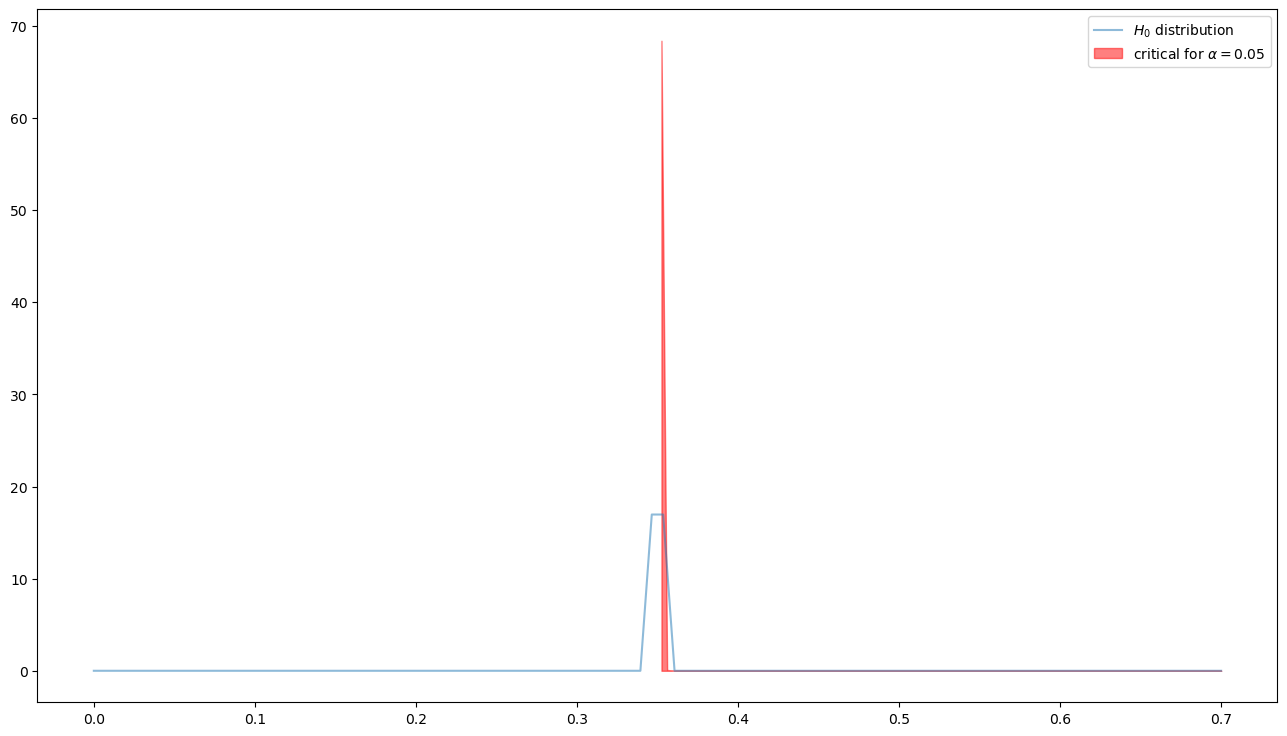

In [19]:
n = 10 #1000, 10000
p1 = 0.35
alpha = 0.05
norm_rv_H0 = sts.norm(p1, np.sqrt(p1*(1-p1)/n))
plt.figure(figsize=(16,9))
x = np.linspace(0,0.7,100)
pdf = norm_rv_H0.pdf(x)
plt.plot(x, pdf, label='$H_0$ distribution', alpha=0.5)

q_b = norm_rv_H0.ppf(1-alpha)
print("critical for alpha = {}".format(q_b))
to_fill = np.linspace(q_b, 0.7, 100)
plt.fill_between(to_fill, norm_rv_H0.pdf(to_fill), alpha=0.5, color='red', label='critical for $\\alpha = {}$'.format(alpha))

plt.legend()

Допустим, что существенным изменением для нас будет являться изменение на одну десятую. Т.е. мы начнем массово откручивать второе объявление только при $p_2 = 0.45$. Так мы задали ожидаемый размер эффекта. Кроме того, теперь мы можем задать **простую** гипотезу в качестве альтернативы! 

**Вопрос: Какая здесь нулевая гипотеза, а какая альтернатива?**

Ответ: ...

Давайте также определимся с ошибкой 2-ого рода $\beta$, и соответственно с мощностью критерия ($1 - \beta$). Чем мощнее критерий, тем лучше. Мощность говорит нам о том, какую долю событий при истинности альтернативной гипотезы мы действительно отнесем к альтернативе. В нашем случае, в целом мы переживем, если окажется, что второе объявление лучше, но эксперимент даст ложно отрицательный результат. Поэтому можно взять $\beta = 0.1$ (побольше чем ошибка 1-ого рода), здесь мы следуем стратегии "не навреди".

Теперь когда мы определились с желаемым размером эффекта, а также с желаемыми значениями ошибок 1-ого и 2-ого рода, осталось лишь определить сколько событий нам нужно набрать, чтобы удовлетворить параметрам эксперимента. Но для начала, давайте посмотрим на то, как меняется ошибка 2-ого рода при фиксированной ошибке 1-ого рода и переменном размере выборки.

c for alpha = 0.3994217007717204
calculated beta for p2 = 0.45: 0.053274451064131124


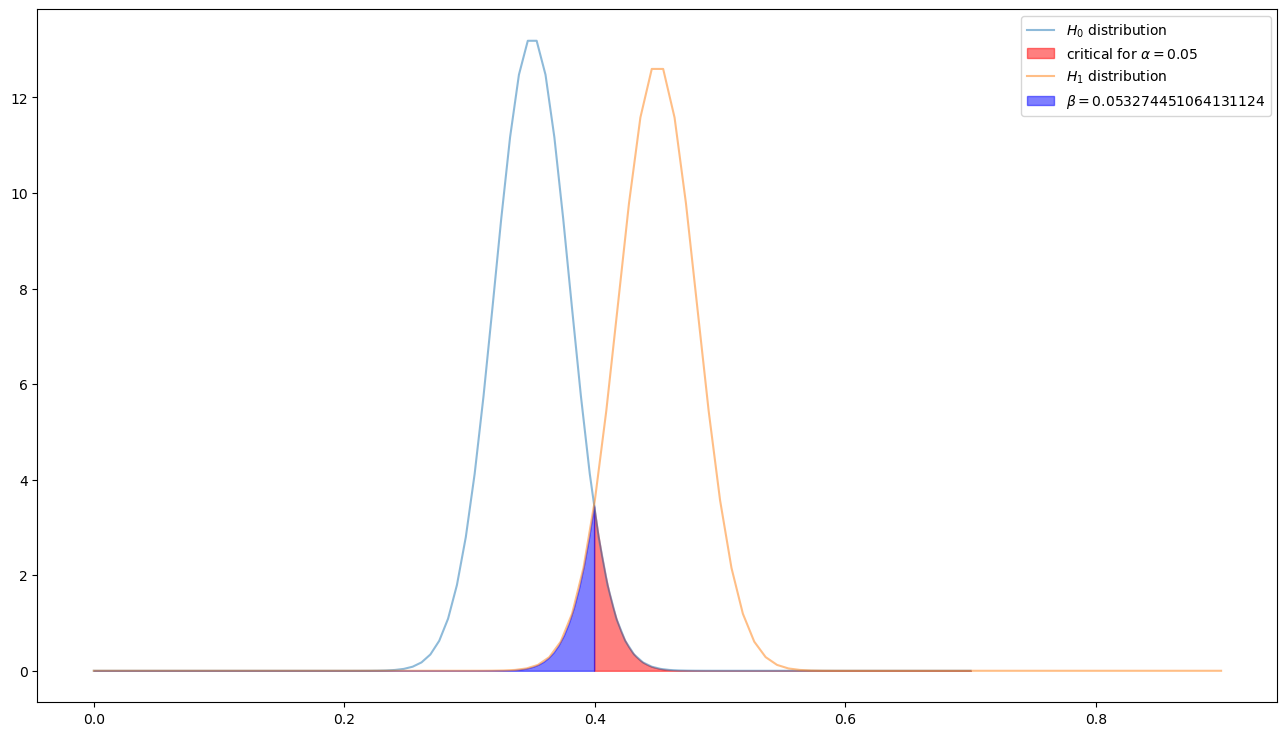

In [24]:
n = 252 #n_max
p1 = 0.35
p2 = 0.45
alpha = 0.05
norm_rv_H0 = sts.norm(p1, np.sqrt(p1*(1-p1)/n))
norm_rv_H1 = sts.norm(p2, np.sqrt(p2*(1-p2)/n))

plt.figure(figsize=(16,9))

x = np.linspace(0,0.7,100)
pdf = norm_rv_H0.pdf(x)
plt.plot(x, pdf, label='$H_0$ distribution', alpha=0.5)

q_b = norm_rv_H0.ppf(1-alpha)
print("c for alpha = {}".format(q_b))
to_fill = np.linspace(q_b, 0.7, 100)
plt.fill_between(to_fill, norm_rv_H0.pdf(to_fill), alpha=0.5, color='red', label='critical for $\\alpha = {}$'.format(alpha))

x = np.linspace(0,0.9,100)
pdf = norm_rv_H1.pdf(x)
plt.plot(x, pdf, label='$H_1$ distribution', alpha=0.5)

beta = norm_rv_H1.cdf(q_b)
q_a = norm_rv_H1.ppf(norm_rv_H1.cdf(q_b))
print("calculated beta for p2 = {}: {}".format(p2, beta))
to_fill = np.linspace(0, q_a, 100)
plt.fill_between(to_fill, norm_rv_H1.pdf(to_fill), alpha=0.5, color='blue', label='$\\beta = {}$'.format(beta))

plt.legend()

### Мы можем вычислить кол-во событий, а также порог для принятия решения с заданными параметрами эксперимента, решив следующую систему уравнений

$$
c = p_1 + \zeta_{\alpha}\sqrt{\frac{p_1(1-p_1)}{n}} \\
c = p_2 + \zeta_{\beta}\sqrt{\frac{p_2(1-p_2)}{n}}
$$

В качестве небольшой разминки, предлагается решить эту систему относительно $n$

In [21]:
def get_size(theta_c, theta_t, alpha, beta):
    # вычисляем квантили нормального распределения
    t_alpha = sts.norm.ppf(1 - alpha, loc=0, scale=1)
    t_beta = sts.norm.ppf(beta, loc=0, scale=1)
    # решаем уравнение относительно n
    n = t_alpha*np.sqrt(theta_t*(1 - theta_t))
    n -= t_beta*np.sqrt(theta_c*(1 - theta_c))
    n /= theta_c - theta_t
    return int(np.ceil(n*n))

alpha = 0.025
beta = 0.1


n_max = get_size(p1, p2, alpha, beta)
print("Требуемое кол-во событий {}".format(n_max))
# выводим порог, выше которого отклоняется H_0
print("Отклоняем нулевую гипотезу впользу альтернативы при значении CTR = {}".format(p1 + sts.norm.ppf(1 - alpha, loc=0, scale=1)*np.sqrt(p1*(1 - p1)/n_max)))


Требуемое кол-во событий 252
Отклоняем нулевую гипотезу впользу альтернативы при значении CTR = 0.40888958870268227


## T-test (альтернативный способ)

$n_{1} \le n_{2}$

$\sigma_{1} \le \sigma_{2}$


In [147]:
n1 = 10000 # n_max
n2= 10010
p1 = 0.45
p2 = 0.45
rng = np.random.default_rng()
norm_rv_H0 = sts.norm.rvs(p1, np.sqrt(p1*(1-p1)/n1), size=n1, random_state=rng)
norm_rv_H1 = sts.norm.rvs(p2, np.sqrt(p2*(1-p2)/n2), size=n2, random_state=rng)

TtestResult = sts.ttest_ind(norm_rv_H0, norm_rv_H1, alternative='two-sided')
print(TtestResult)
TtestResult.confidence_interval(.95)

TtestResult(statistic=-0.7146790698924957, pvalue=0.47481571179832227, df=20008.0)


ConfidenceInterval(low=-0.0001887393983367753, high=8.787949645797273e-05)

In [150]:
# Проверяем соотношение размеров выборок и дисперсий

assert (norm_rv_H0.var() <= norm_rv_H1.var()) & (n1<=n2)

In [149]:
print(len(norm_rv_H0), len(norm_rv_H1))
print(norm_rv_H0.var(), norm_rv_H1.var())

10000 10010
2.4848701539273678e-05 2.4962617520743164e-05


## А как в реальности? 

Что делать, если выборки скошены?

In [34]:
# сначала TTest
n = 10000
p1 = .015  
p2 = .0151 # совсем небольшое отличие
norm_rv_H0 = sts.norm.rvs(p1, np.sqrt(p1*(1-p1)/n), size=n) 
norm_rv_H1 = sts.norm.rvs(p2, np.sqrt(p2*(1-p2)/n), size=n) 
TtestResult = sts.ttest_ind(norm_rv_H0, norm_rv_H1, equal_var=False) # сначала TTest
print('Сравнение через параметры нормального распределения')
print(f'p-value = {TtestResult.pvalue}')
print(TtestResult.confidence_interval(.95))
bernoulli_rv_H0 = sts.bernoulli.rvs(p1, size=n) 
bernoulli_rv_H1 = sts.bernoulli.rvs(p2, size=n) 
TtestResult = sts.ttest_ind(bernoulli_rv_H0, bernoulli_rv_H1, equal_var=False) 
print('\nСравнение через параметры распределения Бернулли')
print(f'p-value = {TtestResult.pvalue}') # В случае ошибки/экстремальных значений перезапустить тест
print(TtestResult.confidence_interval(.95))

Сравнение через параметры нормального распределения
p-value = 3.685021826319031e-10
ConfidenceInterval(low=-0.00014180467191876053, high=-7.425984410840684e-05)

Сравнение через параметры распределения Бернулли
p-value = 0.9514099459214005
ConfidenceInterval(low=-0.003316569213960761, high=0.003116569213960759)


###### _скошенные распределения не сравниваются через параметры нормального распределения_


### _Используем метод Вилсона (Wilson)_

In [36]:
from statsmodels.stats.proportion import proportion_confint as pc

In [43]:
# Создаем две скошенные последовательности и вычисляем доверительные интервалы
n_min = 9900
p1 = .015  
p2 = .012
A = gen_events(p=p1, lower_=n_min, upper_=n)
B = gen_events(p=p2, lower_=n_min, upper_=n)
n1 = len(A)
n2 = len(B)
conf_A = pc(sum(A), n1, alpha=0.05, method='wilson')
conf_B = pc(sum(B), n2, alpha=0.05, method='wilson')
# интервальные оценки для эксперементальных выборок
print(f"ДИ последовательности A: {conf_A}, n\u2081={n1}, \u0394A={conf_A[1]-conf_A[0]}")
print(f"ДИ последовательности B: {conf_B}, n\u2082={n2}, \u0394B={conf_B[1]-conf_B[0]}")

ДИ последовательности A: (0.013386871241092611, 0.018289196661799526), n₁=9904, ΔA=0.0049023254207069145
ДИ последовательности B: (0.009585213297947546, 0.013800419787239284), n₂=9910, ΔB=0.004215206489291738


##### _см. выше_

$H_0:\ p_1 - p_2 = 0$

$H_1:\ p_1 - p_2 > 0$

В случае если нулевая гипотеза верна, то 

$\hat{p_1} - \hat{p_2} \sim \mathbf{N}(p_1 - p_2 = 0, \frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2})$ 

In [44]:
# Строим доверительный интервал отличия двух эксперементальных выборок
alpha = .05
z = sts.norm.ppf(1-alpha/2)
p1_ = np.mean(A) 
p2_ = np.mean(B) 
p__ = '\u0070\u0302' # "p" с крышечкой
print (f"Экспериментальные значения {p__}\u2081={p1_} и {p__}\u2082={p2_}")
lower_bond = (p1_ - p2_) - z*np.sqrt(p1_*(1-p1_)/n1 + p2_*(1-p2_)/n2)
upper_bond = (p1_ - p2_) + z*np.sqrt(p1_*(1-p1_)/n1 + p2_*(1-p2_)/n2)
print (f"Доверительный интервал {lower_bond} ... {upper_bond}")

Экспериментальные значения p̂₁=0.015650242326332796 и p̂₂=0.011503531786074672
Доверительный интервал 0.0009244255815470913 ... 0.007368995498969157


#### Оценим p-value

$$Z-статистика: Z({X_1, X_2}) =  \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{P(1 - P)(\frac{1}{n_1} + \frac{1}{n_2})}}$$


  $$P = \frac{\hat{p}_1{n_1} + \hat{p}_2{n_2}}{{n_1} + {n_2}} $$

#### считаем p-value

In [45]:
P = float(p1_*n1 + p2_*n2) / (n1 + n2)
# двустронняя альтернатива, неизвестно есть ли вообще отличие, большое p-value в пользу H0
Z_stat = (p1_ - p2_) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
p_value = 2 * (1 - sts.norm.cdf(np.abs(Z_stat/2)))
p_value

0.20731629195508372

In [46]:
sts.norm.cdf(Z_stat) #less

0.9941648291008478

In [47]:
1-sts.norm.cdf(Z_stat) #greater

0.005835170899152198

### Небольшие выборки
### непараметрический тест
### U-тест Манна-Уитни

In [48]:
import statsmodels.stats.weightstats as ssw

In [49]:
# задаем значения сравниваемых выборок
sample1 = [2, 2, 21, 2, 0, 24, 23, 19]
sample2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
print ("95% доверительный интервал для 1й последовательности ", ssw.zconfint(sample1))
print ("95% доверительный интервал для 2й последовательности ", ssw.zconfint(sample2))

95% доверительный интервал для 1й последовательности  (4.0436998036179626, 19.20630019638204)
95% доверительный интервал для 2й последовательности  (20.91067867443465, 24.58932132556535)


In [50]:
# Функция запуска теста Манна-Уитни с разными альтернативами
def u_test (s1=sample1, s2=sample2):
    alternatives = ['less', 'greater', 'two-sided']
    for a in alternatives:
        print (f"\nДля альтенативы {a}", sts.mannwhitneyu (s1, s2, alternative=a))

In [51]:
# Запускает тест Манна-Уитни (U-test)
u_test()



Для альтенативы less MannwhitneyuResult(statistic=19.0, pvalue=0.01347748531299657)

Для альтенативы greater MannwhitneyuResult(statistic=19.0, pvalue=0.9889832318147022)

Для альтенативы two-sided MannwhitneyuResult(statistic=19.0, pvalue=0.02695497062599314)


In [52]:
# Задаем значения сравниваемых визуально похожих выборок
sample1 = [ .5, .7, .8, 1.1, 1.5, 0.3, 3.3 , 3.6, .25]
sample2 = [2,2,2.01, 1.99, 1.98, 2.07, 2.1, 1.95,1.99, 2.03 ]
print ("95% доверительный интервал для 1й последовательности ", ssw.zconfint(sample1))
print ("95% доверительный интервал для 2й последовательности ", ssw.zconfint(sample2))
# Запускает тест Манна-Уитни (U-test)
u_test(sample1, sample2)

95% доверительный интервал для 1й последовательности  (0.515441922005136, 2.1623358557726418)
95% доверительный интервал для 2й последовательности  (1.9846227960011762, 2.0393772039988236)

Для альтенативы less MannwhitneyuResult(statistic=20.0, pvalue=0.02263302731382631)

Для альтенативы greater MannwhitneyuResult(statistic=20.0, pvalue=0.9814151431860718)

Для альтенативы two-sided MannwhitneyuResult(statistic=20.0, pvalue=0.04526605462765262)


In [53]:
# Задаем значения сравниваемых визуально НЕпохожих выборок
sample1 = [ 20.5, 20.7, 20.8, 21.1, 21.5, 20.3, 23.3 , 23.6, 22.25]
sample2 = [-20.5,-20.7,-20.8, -21.1, 21.5, 20.3, 23.3 , 23.6, 2.25, 20.13,]
print ("95% доверительный интервал для 1й последовательности ", ssw.zconfint(sample1))
print ("95% доверительный интервал для 2й последовательности ", ssw.zconfint(sample2))
# Запускает тест Манна-Уитни (U-test)
u_test(sample1, sample2) 

95% доверительный интервал для 1й последовательности  (20.7640025667556, 22.358219655466627)
95% доверительный интервал для 2й последовательности  (-10.32184294990465, 15.91784294990465)

Для альтенативы less MannwhitneyuResult(statistic=68.0, pvalue=0.9727060605126291)

Для альтенативы greater MannwhitneyuResult(statistic=68.0, pvalue=0.03285852064161489)

Для альтенативы two-sided MannwhitneyuResult(statistic=68.0, pvalue=0.06571704128322978)


In [54]:
# Поменяем местами примеры и посмотрим результат
u_test(sample2, sample1)


Для альтенативы less MannwhitneyuResult(statistic=22.0, pvalue=0.03285852064161489)

Для альтенативы greater MannwhitneyuResult(statistic=22.0, pvalue=0.9727060605126291)

Для альтенативы two-sided MannwhitneyuResult(statistic=22.0, pvalue=0.06571704128322978)
